In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df=pd.read_csv('Downloads/archive (6)/spam.csv')

In [24]:
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will  _ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [26]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
3330   ham          How much it will cost approx . Per month.        NaN   
3958   ham                           Have a nice day my dear.        NaN   
4814   ham                         no home work to do meh...         NaN   
4086  spam  PRIVATE! Your 2003 Account Statement for 07973...        NaN   
621    ham  Good words.... But words may leave u in dismay...        NaN   

     Unnamed: 3 Unnamed: 4  
3330        NaN        NaN  
3958        NaN        NaN  
4814        NaN        NaN  
4086        NaN        NaN  
621         NaN        NaN

In [28]:
df.shape

(5572, 5)

## 1. data ckeaning

In [31]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will  _ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

### drop last three columns

In [34]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)	

In [36]:
df.sample(5)

v1                                                 v2
3144  ham         I.ll get there tomorrow and send it to you
5234  ham                              Ok cool. See ya then.
2199  ham             Not sure I have the stomach for it ...
2727  ham                Whatsup there. Dont u want to sleep
1101  ham  Yeah go on then, bored and depressed sittin wa...

### renaming the cols

In [39]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [41]:
df.sample(5)

target                                               text
3897    ham           Otherwise had part time job na-tuition..
4113    ham  Where are you ? What do you do ? How can you s...
2244    ham                            No management puzzeles.
4086   spam  PRIVATE! Your 2003 Account Statement for 07973...
2604    ham  You call times job today ok umma and ask them ...

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [45]:
 df['target']=encoder.fit_transform(df['target'])

In [47]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

### check missing values

In [50]:
df.isnull().sum()

target    0
text      0
dtype: int64

### check duplicate values

In [53]:
df.duplicated().sum()

403

### remove duplicate

In [56]:
df=df.drop_duplicates(keep='first')

In [58]:
df.duplicated().sum()

0

In [60]:
df.shape

(5169, 2)

# 2.EDA

In [63]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [65]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

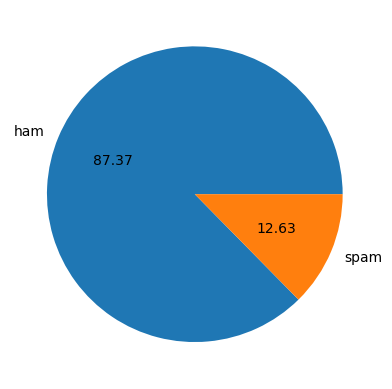

In [67]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [69]:
# data is imbalanced

In [71]:
import nltk
!pip install nltk

In [109]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
df.loc[:, 'num_characters'] = df['text'].apply(lambda x: len(str(x)))

In [113]:
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words  
0            2.0         24  
1            2.0          8  
2            2.0         37  
3            1.0         13  
4            1.0         15

In [115]:
# num of words
from nltk.tokenize import word_tokenize

df.loc['num_words'] = df['text'].apply(lambda x: len(word_tokenize(str(x))))

In [117]:
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words  
0            2.0         24  
1            2.0          8  
2            2.0         37  
3            1.0         13  
4            1.0         15

In [119]:
from nltk.tokenize import sent_tokenize
df.loc[:,'num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(str(x))))

In [121]:
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words  
0            2.0         24  
1            2.0          8  
2            2.0         37  
3            1.0         13  
4            1.0         15

In [123]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5170.000000    5170.000000
mean        78.924163    18.461315       1.966344
std         58.175349    13.339306       1.449221
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [138]:
#ham
df[df['target']==0][['num_characters','num_sentences','num_words']].describe()

num_characters  num_sentences    num_words
count     4516.000000    4516.000000  4516.000000
mean        70.457263       1.820416    17.127325
std         56.357463       1.383286    13.504667
min          2.000000       1.000000     1.000000
25%         34.000000       1.000000     8.000000
50%         52.000000       1.000000    13.000000
75%         90.000000       2.000000    22.000000
max        910.000000      38.000000   220.000000

In [140]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.479326   27.713629       2.977029
std         30.014336    7.015260       1.492648
min         13.000000    2.000000       1.000000
25%        131.000000   25.000000       2.000000
50%        148.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        223.000000   46.000000       9.000000

<Axes: xlabel='num_words', ylabel='Count'>

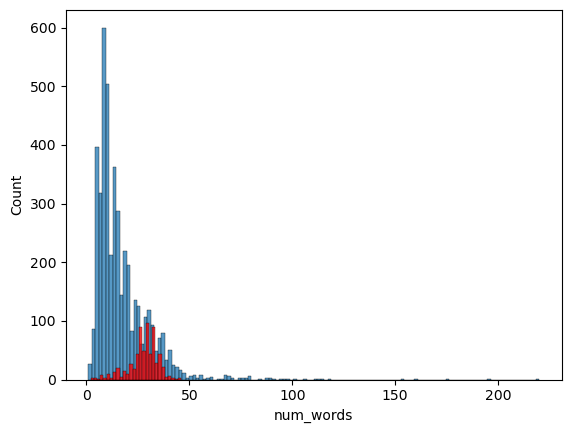

In [142]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

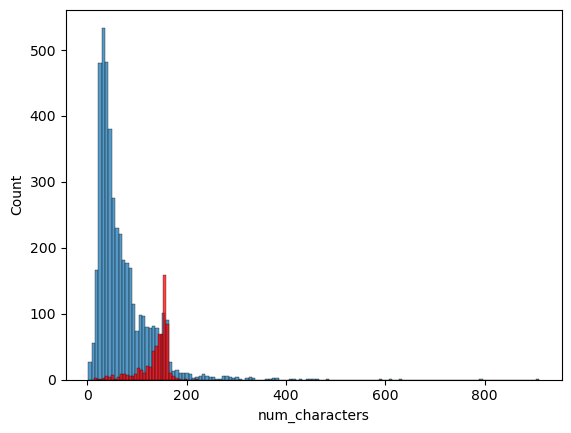

In [144]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

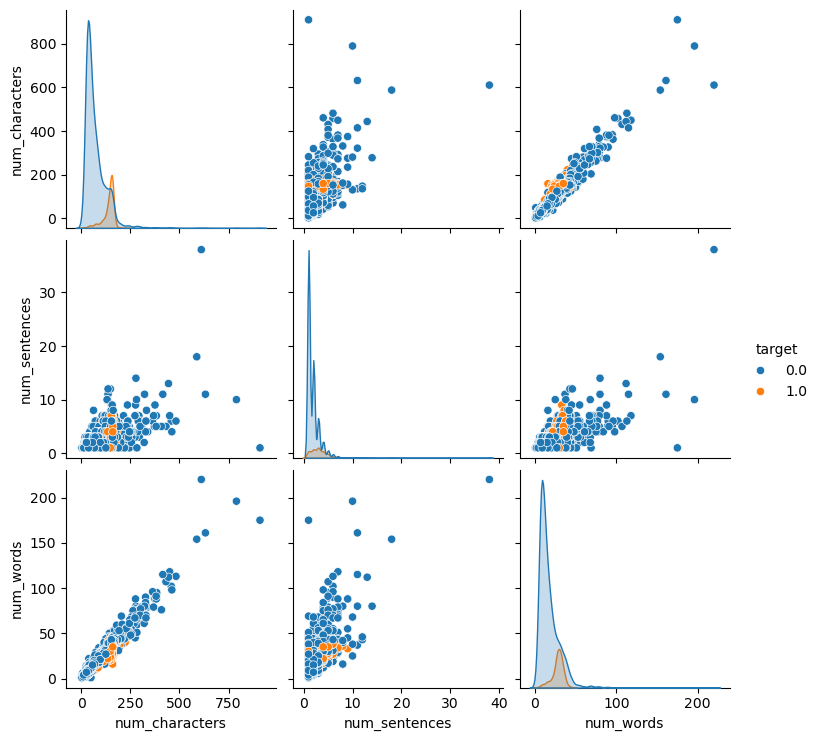

In [146]:
sns.pairplot(df,hue='target')

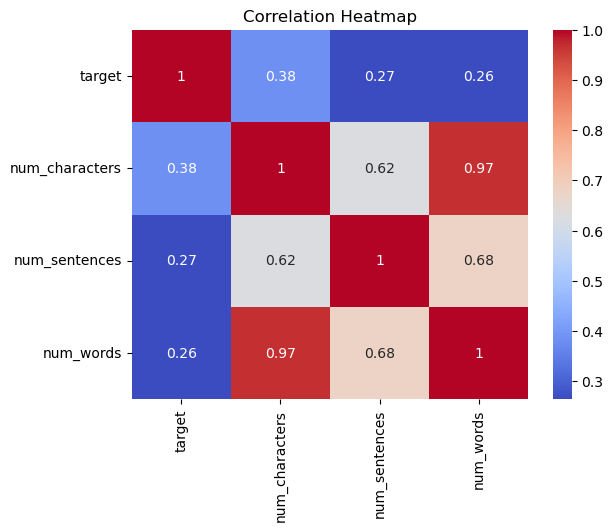

In [147]:
numeric_df = df.select_dtypes(include='number')

# Heatmap with correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 3. data preprocessing

### Lower case
### Tokenization
### Removing special character 
### Removing stop words and punctuation 
### Stemmimg

In [164]:
 def transform_text(text):
     text=text.lower()
     text=nltk.word_tokenize(text)
     
     y=[]
     for i in text:
        if i.isalnum(): 
             y.append(i)
     text=y[:]
     y.clear()

     for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)

     text=y[:]
     y.clear()
     for i in text:
         y.append(ps.stem(i))
         
     
     return " ".join(y)

In [172]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download once before using

stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [174]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [188]:
transform_text('Hi my Name is 50% Samta')

'hi name 50 samta'

In [190]:
df.loc[2000, 'text']

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [192]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
print(ps.stem('loving'))

love


In [194]:

df.loc[:, 'transformed_text'] = df['text'].apply(lambda x: transform_text(str(x)))


In [185]:
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words                                   transformed_text  
0            2.0         24  go jurong point crazi avail bugi n great world...  
1            2.0          8                              ok lar joke wif u oni  
2            2.0         37  free entri 2 wkli comp win fa cup final tkt 21...  
3            1.0         13                u dun say earli hor u c alreadi say  
4            1.0         15               nah think goe usf live around though

In [195]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, background_color='white')

In [198]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

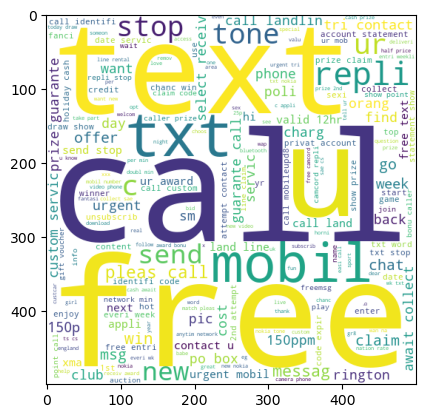

In [210]:
plt.imshow(spam_wc)

In [212]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, background_color='white')

In [214]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

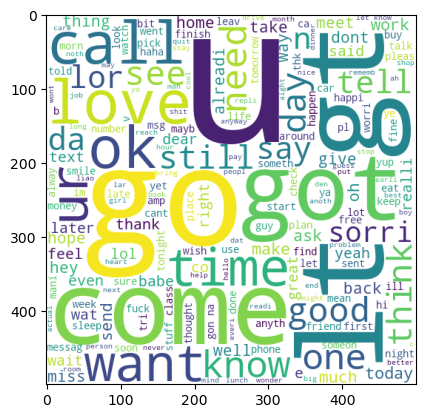

In [216]:
plt.imshow(ham_wc)

In [218]:
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words                                   transformed_text  
0            2.0         24  go jurong point crazi avail bugi n great world...  
1            2.0          8                              ok lar joke wif u oni  
2            2.0         37  free entri 2 wkli comp win fa cup final tkt 21...  
3            1.0         13                u dun say earli hor u c alreadi say  
4            1.0         15               nah think goe usf live around though

In [220]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [222]:
len(spam_corpus)

10144

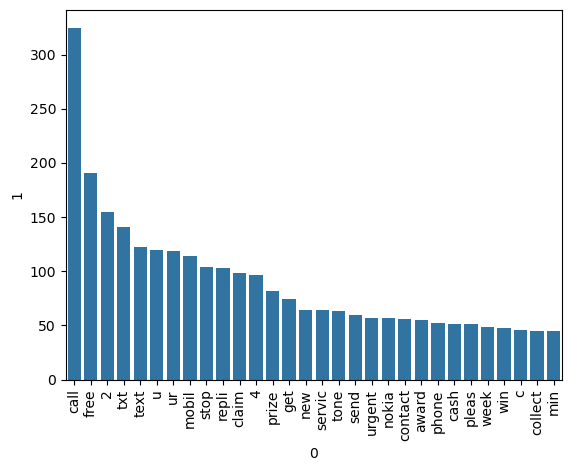

In [224]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [226]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [228]:
len(ham_corpus)

35332

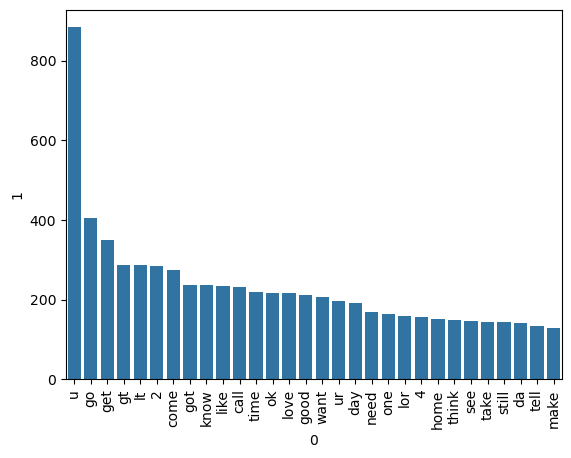

In [230]:
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plot
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [232]:
# Text vectorization 
# using Bag of words
df.head()

target                                               text  num_characters  \
0     0.0  Go until jurong point, crazy.. Available only ...           111.0   
1     0.0                      Ok lar... Joking wif u oni...            29.0   
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...           155.0   
3     0.0  U dun say so early hor... U c already then say...            49.0   
4     0.0  Nah I don't think he goes to usf, he lives aro...            61.0   

   num_sentences  num_words                                   transformed_text  
0            2.0         24  go jurong point crazi avail bugi n great world...  
1            2.0          8                              ok lar joke wif u oni  
2            2.0         37  free entri 2 wkli comp win fa cup final tkt 21...  
3            1.0         13                u dun say earli hor u c alreadi say  
4            1.0         15               nah think goe usf live around though

## 4.Model Bulding

In [235]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [237]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [239]:
X.shape

(5170, 6701)

In [241]:
y = df[df['target'].notna()]['target'].values

In [243]:
y


array([0., 0., 1., ..., 0., 0., 0.])

In [245]:
X = df['text']
y = df['target']

from sklearn.model_selection import train_test_split

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [249]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [251]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [253]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# 1. Drop rows with missing target
df = df.dropna(subset=['text', 'target'])

# 2. Vectorize text data
cv = CountVectorizer()
X = cv.fit_transform(df['text']).toarray()  # Convert text to numeric
y = df['target']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 4. Train model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9119922630560928
Confusion Matrix:
 [[822  74]
 [ 17 121]]
Precision: 0.6205128205128205


In [254]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[877  19]
 [  6 132]]
0.8741721854304636


In [257]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[894   2]
 [ 20 118]]
0.9833333333333333


In [258]:
# tfidf->bnb

In [261]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))